In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create sample small dataset
data = {
    'Hours_Studied': [2, 4, 6, 8, 10, 1, 2, 3, 12, 14],  
    'Sleep_Hours': [7, 6, 8, 5, 7, 10, 12, 11, 6, 5],    
    'Attendance': [70, 85, 80, 60, 90, 40, 50, 60, 90, 95], 
    'Pass_Exam': [0, 0, 1, 1, 1, 0, 0, 0, 1, 1]  
}
df = pd.DataFrame(data)
df


,Hours_Studied,Sleep_Hours,Attendance,Pass_Exam
0,2,7,70,0
1,4,6,85,0
2,6,8,80,1
3,8,5,60,1
4,10,7,90,1
5,1,10,40,0
6,2,12,50,0
7,3,11,60,0
8,12,6,90,1
9,14,5,95,1


In [2]:
# Features (X) and target (y)
X = df[['Hours_Studied', 'Sleep_Hours', 'Attendance']]
y = df['Pass_Exam']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nX_Train:\n', X_train, '\n\nX_test:\n', X_test, '\n\ny_train:\n', y_train, '\n\ny_test:\n', y_test) 


X_Train:
    Hours_Studied  Sleep_Hours  Attendance
5              1           10          40
0              2            7          70
7              3           11          60
2              6            8          80
9             14            5          95
4             10            7          90
3              8            5          60
6              2           12          50 

X_test:
    Hours_Studied  Sleep_Hours  Attendance
8             12            6          90
1              4            6          85 

y_train:
 5    0
0    0
7    0
2    1
9    1
4    1
3    1
6    0
Name: Pass_Exam, dtype: int64 

y_test:
 8    1
1    0
Name: Pass_Exam, dtype: int64


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest with 2 trees
n_estimators = 2
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42, bootstrap=True)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [4]:
# Access and print the bootstrap samples for each tree
for i, tree in enumerate(rf_model.estimators_):
    # Get the bootstrap sample indices used for training this tree
    bootstrap_indices = tree.tree_.weighted_n_node_samples
    sampled_data = X_train.iloc[tree.apply(X_train)]
    
    print(f"\nTree {i + 1} used the following sampled data:")
    print(sampled_data)


Tree 1 used the following sampled data:
   Hours_Studied  Sleep_Hours  Attendance
0              2            7          70
0              2            7          70
0              2            7          70
7              3           11          60
7              3           11          60
7              3           11          60
7              3           11          60
0              2            7          70

Tree 2 used the following sampled data:
   Hours_Studied  Sleep_Hours  Attendance
0              2            7          70
4             10            7          90
9             14            5          95
3              8            5          60
3              8            5          60
3              8            5          60
9             14            5          95
0              2            7          70


c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [5]:
# Show predictions from each tree
for i, tree in enumerate(rf_model.estimators_):
    tree_prediction = tree.predict(X_test)
    print(f"\nTree {i + 1} predicts: {tree_prediction}")


Tree 1 predicts: [1. 0.]

Tree 2 predicts: [1. 1.]


c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\Balu\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [6]:
# Show the final prediction (majority voting)
final_prediction = rf_model.predict(X_test)
print("\nFinal prediction from Random Forest (majority voting):", final_prediction)


Final prediction from Random Forest (majority voting): [1 0]


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


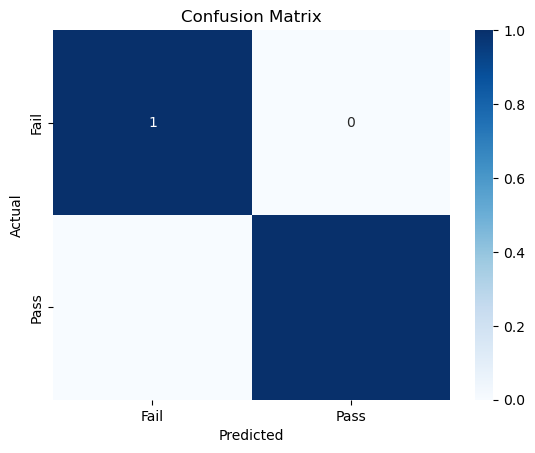

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

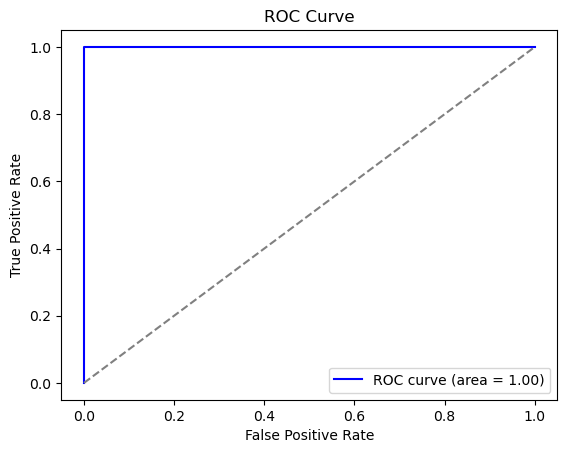

AUC Score: 1.0


In [9]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print("AUC Score:", roc_auc)

In [10]:
# Save the model to a file
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

NameError: name 'model' is not defined